In [14]:
import numpy as np
import random
import dadi
import pickle
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import ml_models
from ml_models import mlpr_train, model_bootstrap
import matplotlib.pyplot as plt
import plotting
from plotting import plot_accuracy_multi

In [29]:
# Load datasets for training
list_train_dict = pickle.load(open('data/train_data_random_5000_theta1','rb'))
train_dict = list_train_dict[0] # train only on theta = 1

In [5]:
# len(train_dict)

2500

In [30]:
# Train MLPR and save the list of trained MLPR into pickle file
mlpr_1 = mlpr_train(train_dict, hidden_layer_sizes=(50,50), 
                        alpha=0.0001, max_iter=1000) 
pickle.dump(mlpr_1, open('data/mlpr_1_new', 'wb'), 2)

In [19]:
# Load test data set and trained model
list_test_dict = pickle.load(open('data/new_func/test_data','rb'))
mlpr_1 = pickle.load(open('data/mlpr_1_new', 'rb'))

In [9]:
# len(list_test_dict[0])

100

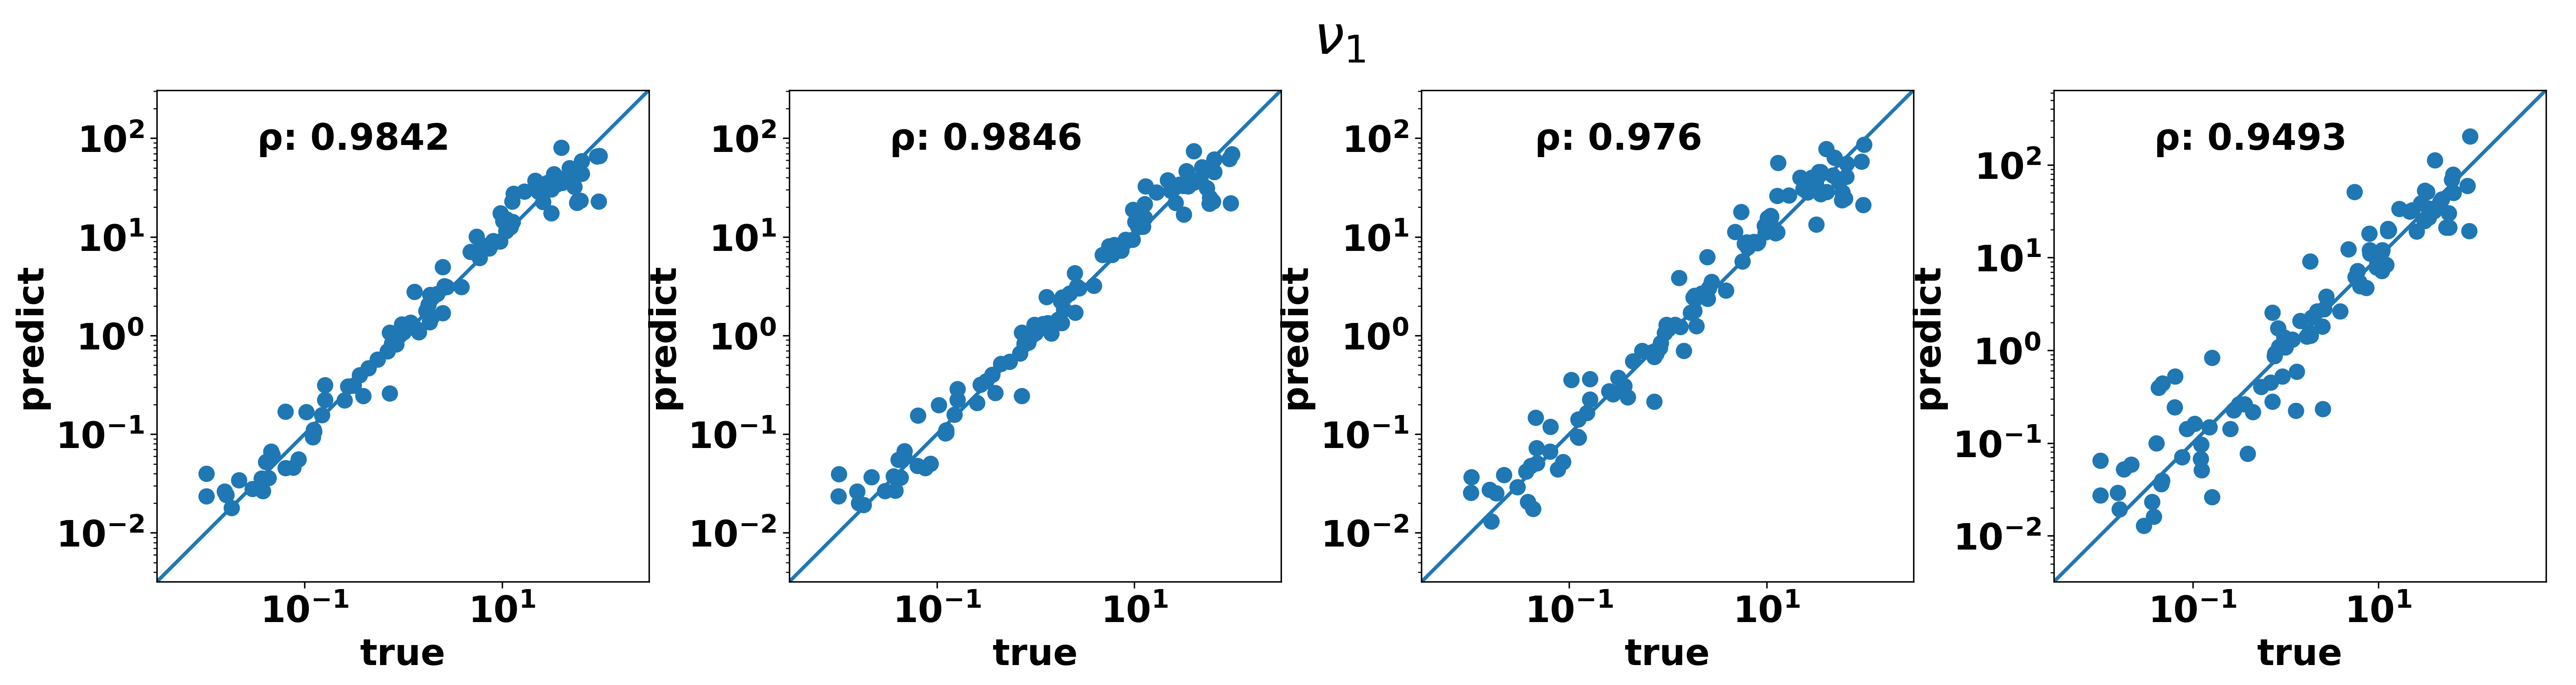

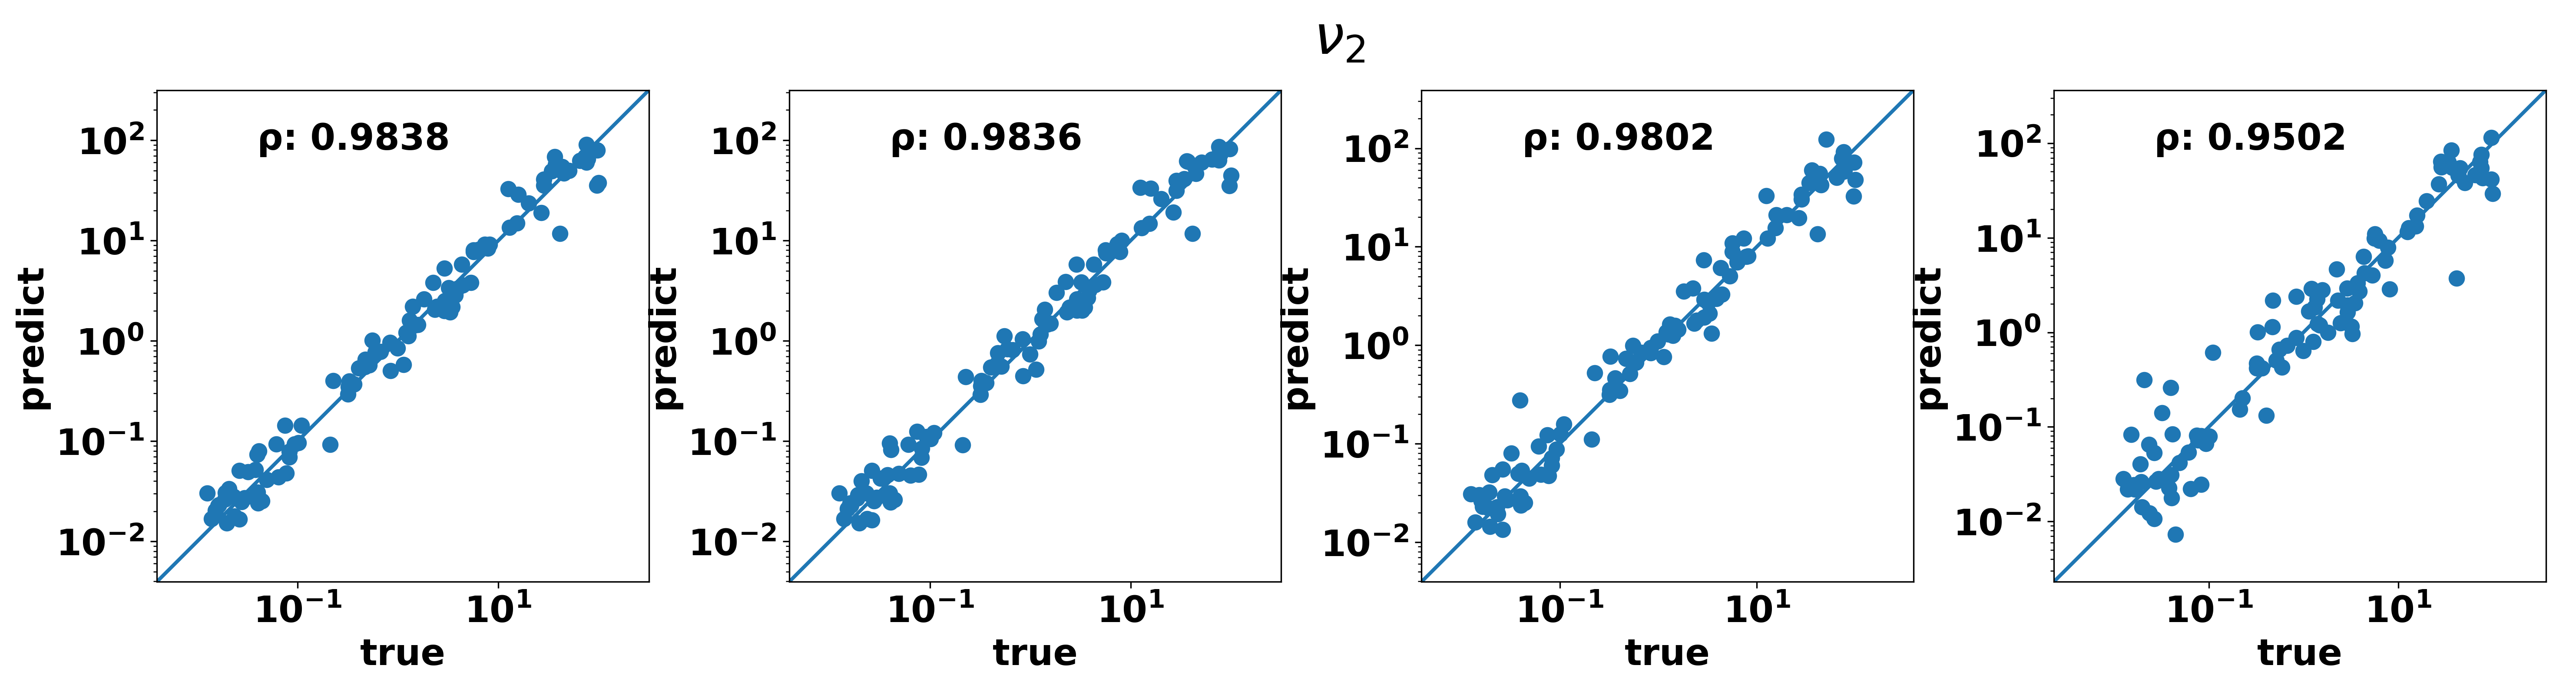

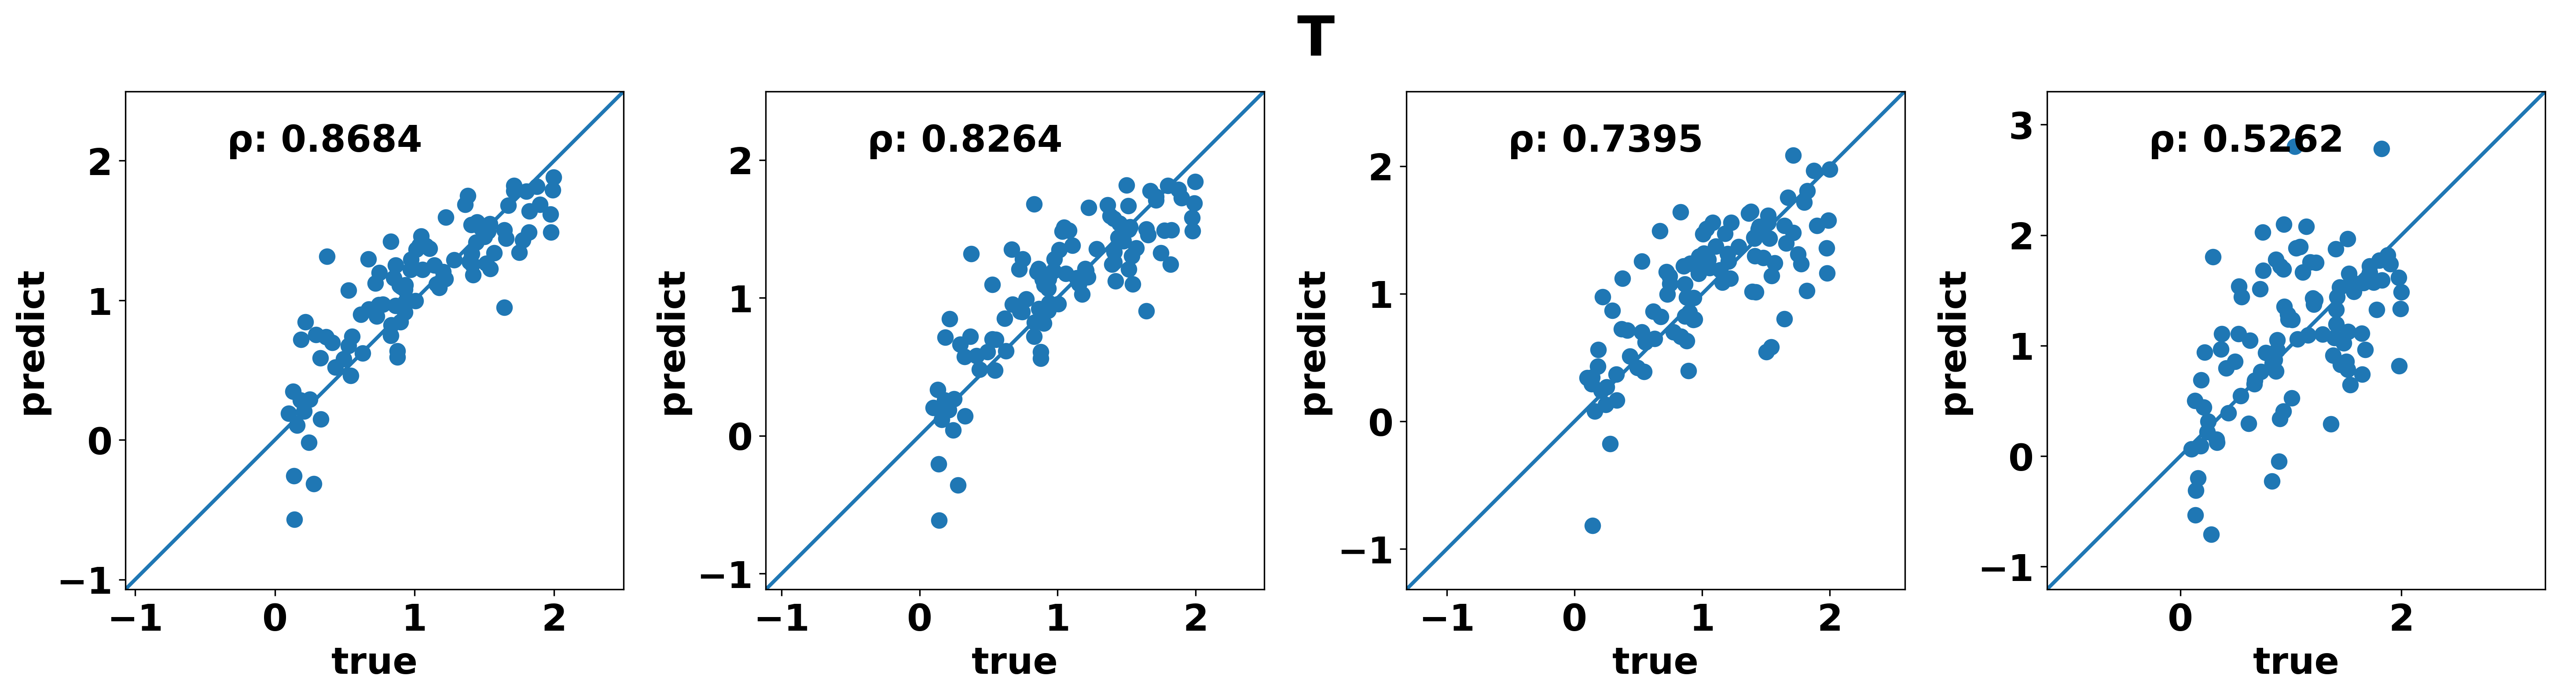

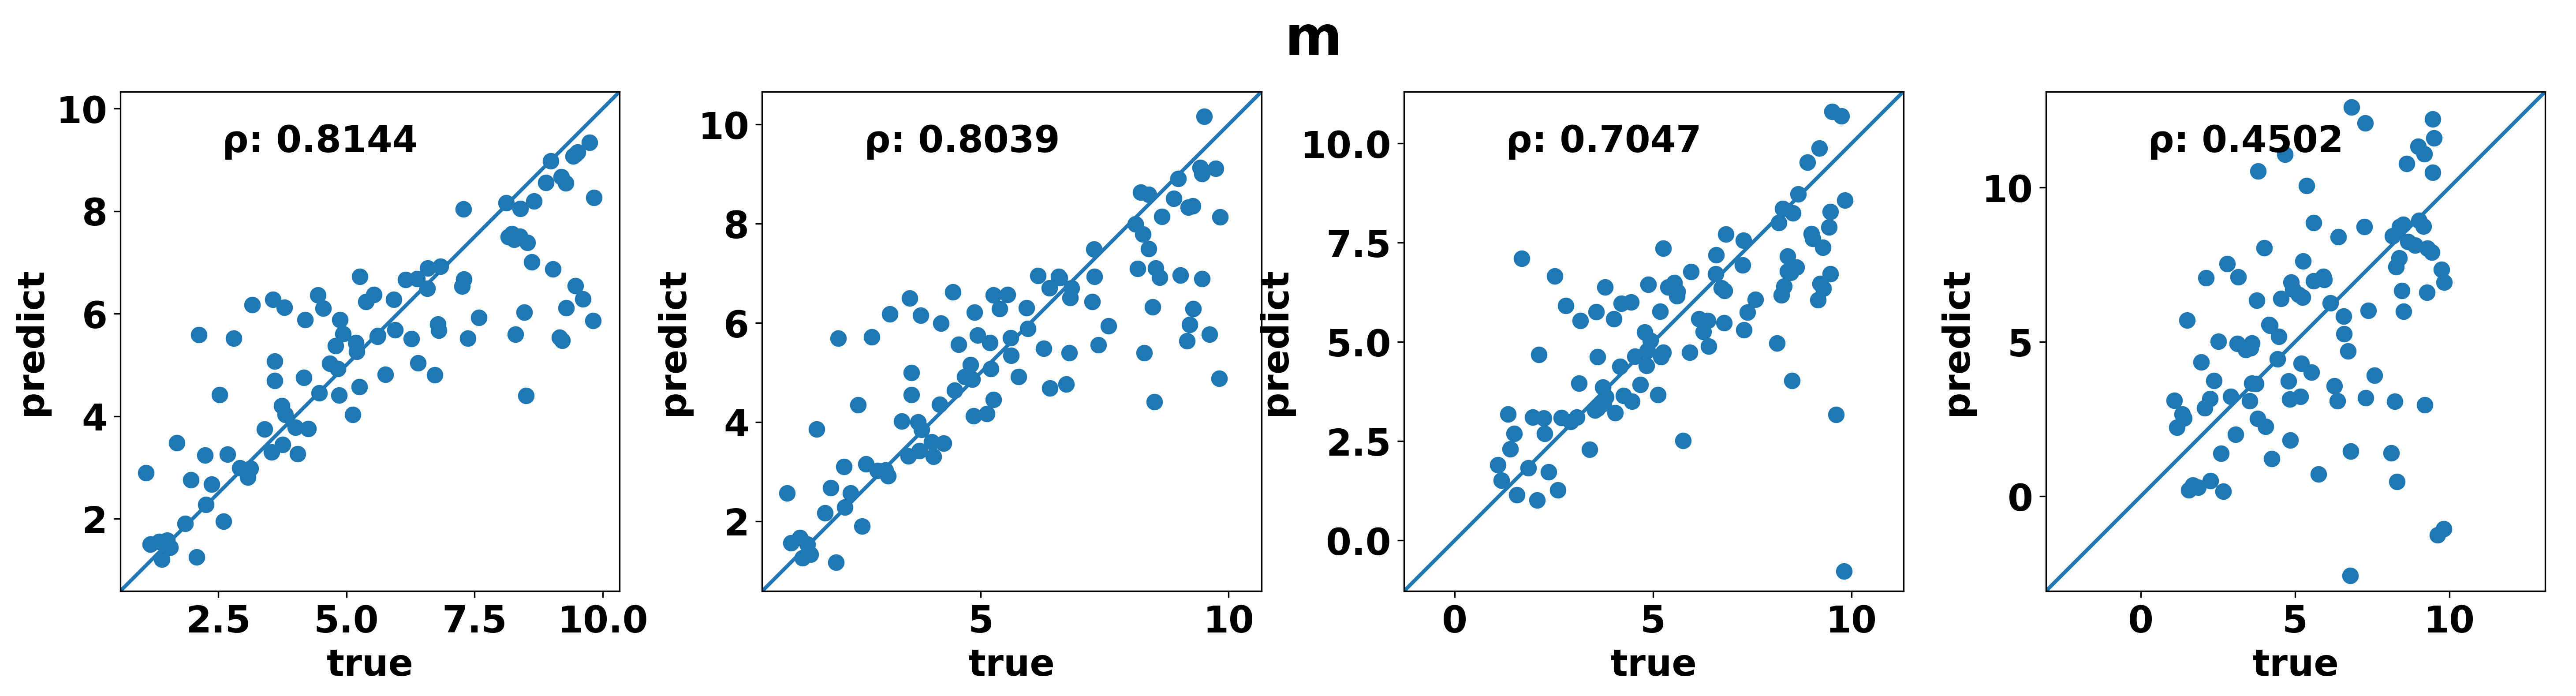

In [31]:
# Plot 1x4 MLPR prediction accuracy
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(24,5))
# plot_accuracy_multi([list_mlpr_random[0]], [list_test_dict[0]], logs, params, size, title='MLPR', x_label="Test variance increases left to right", y_label="MLPR_1_random")
plot_accuracy_multi([mlpr_1], list_test_dict, logs, params, size)

In [33]:
# Run bootstrap prediction
# load bootstrap data
list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))
# load trained model to run bootstrap on and get bootstrap predictions
bstr_mlpr = model_bootstrap(mlpr_1, list_bootstrap_dicts)
# save the results
pickle.dump(bstr_mlpr, open(
    'results/bootstrap/boostrap_pred_mlpr_new', 'wb'), 2)

In [32]:
bstr_mlpr = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_new', 'rb'))

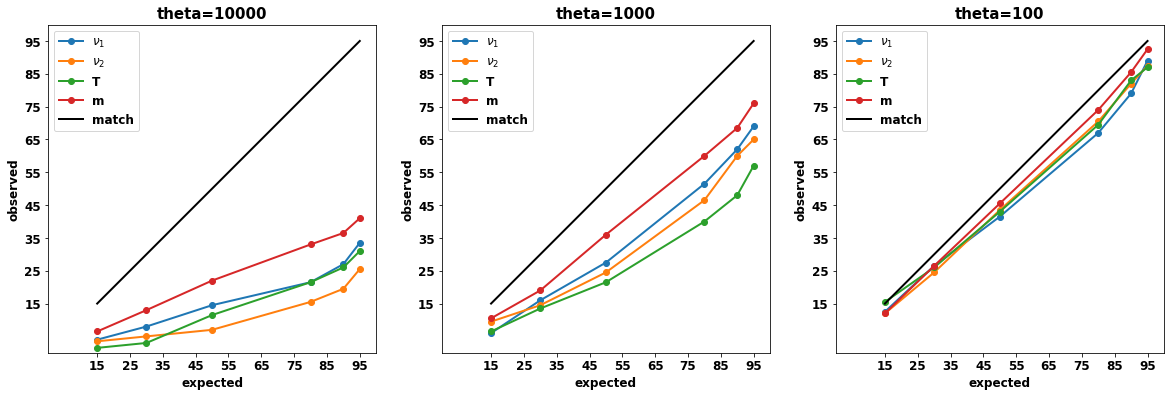

In [37]:
# Plot bootstrap prediction results: coverage
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

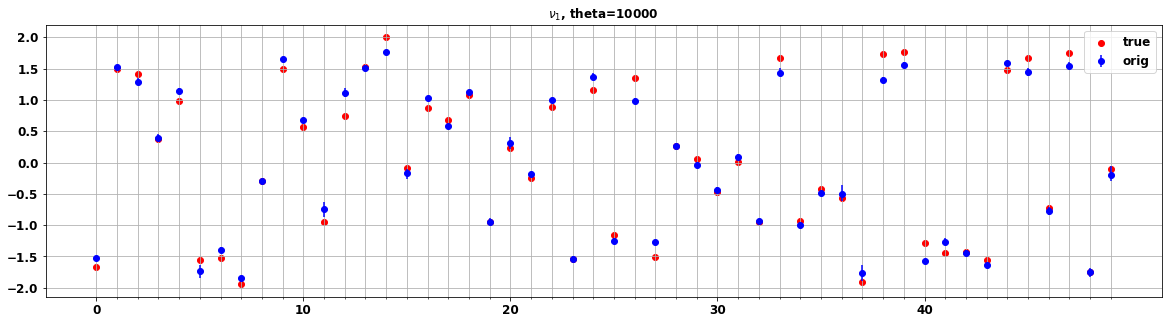

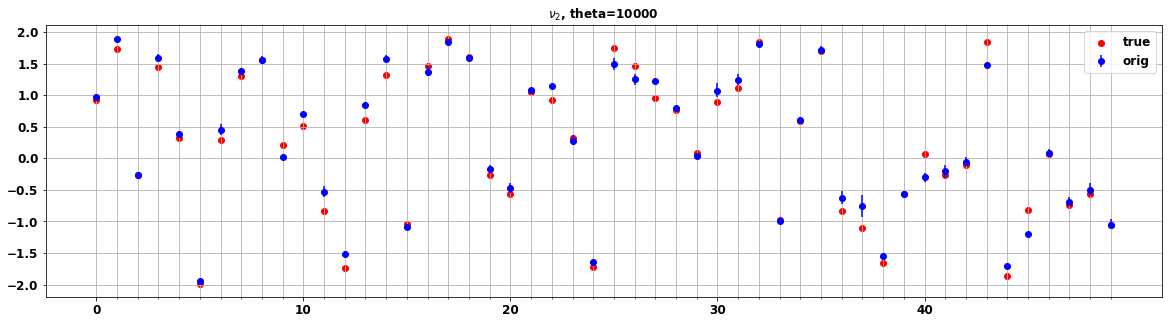

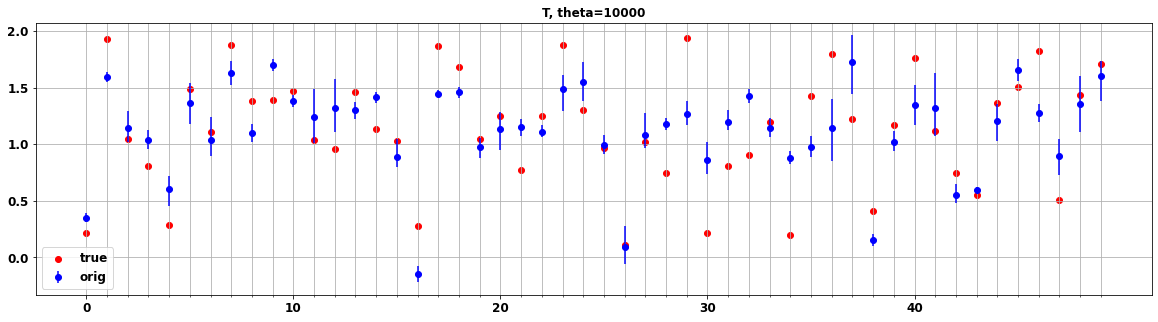

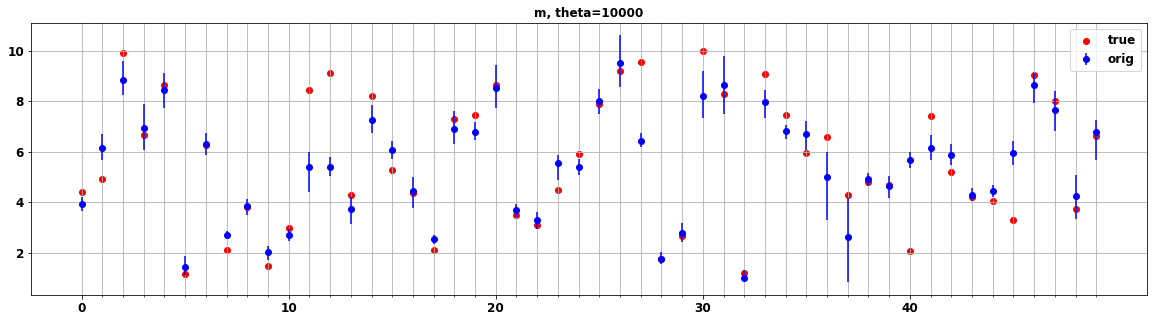

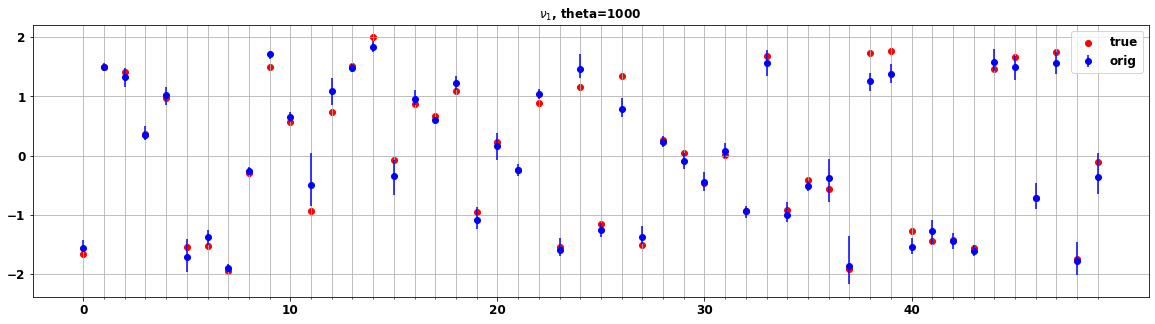

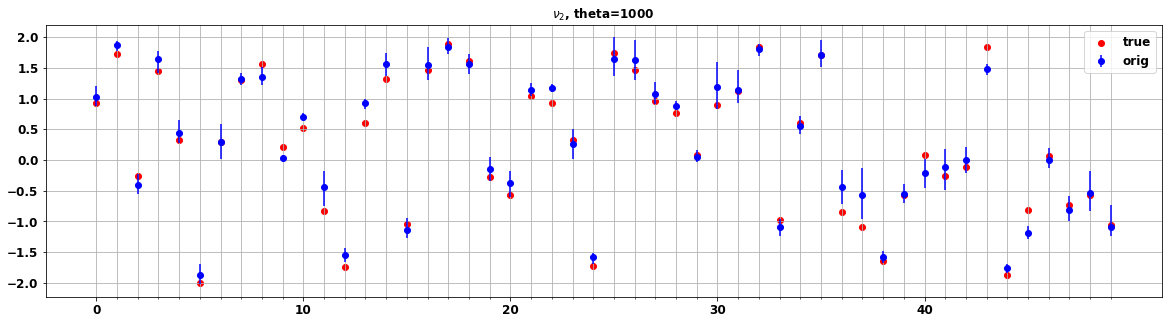

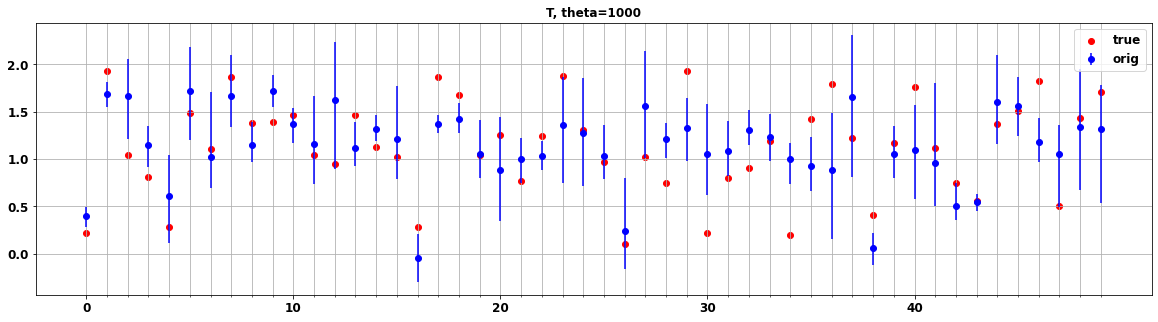

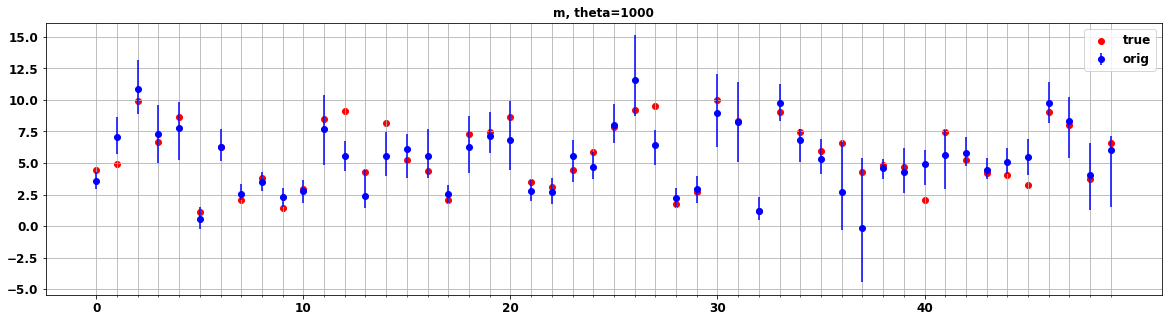

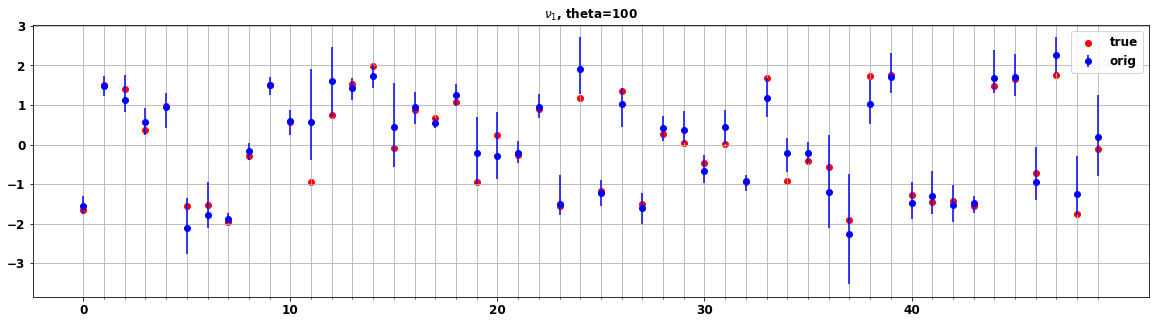

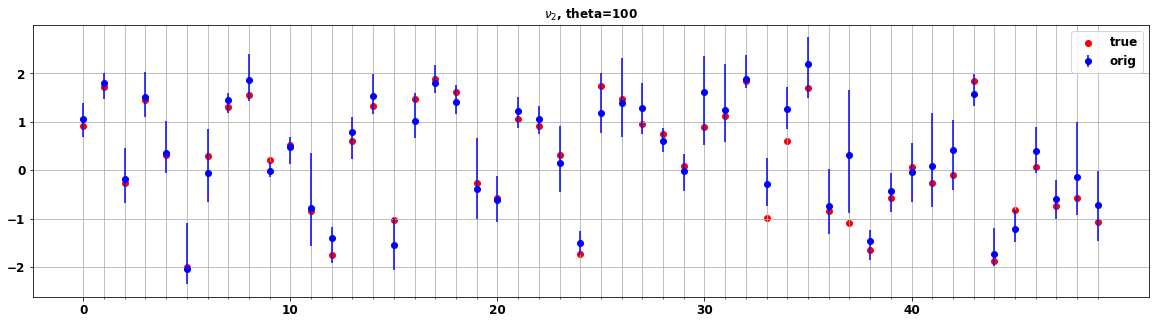

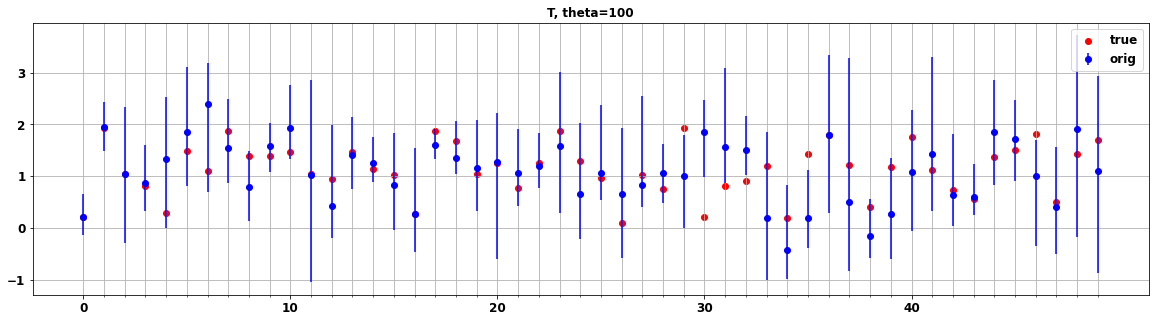

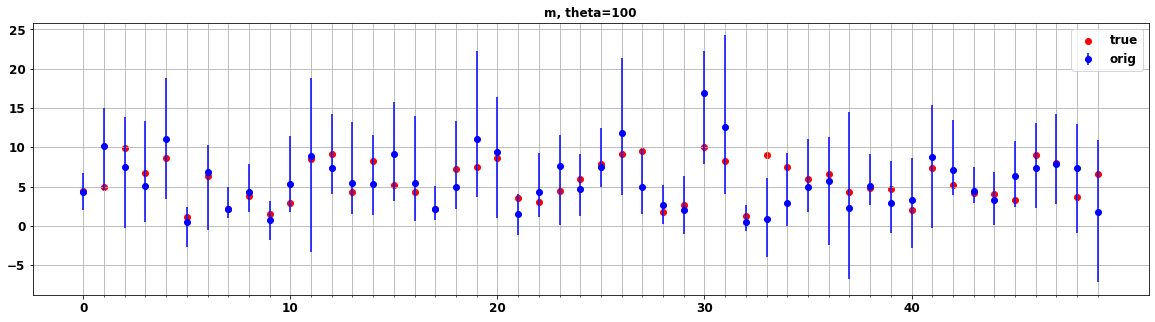

In [35]:
# Plot bootstrap prediction results: intervals for 50 example data sets
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plotting.plot_intervals(bootstrap_pred, theta, params, size=50)

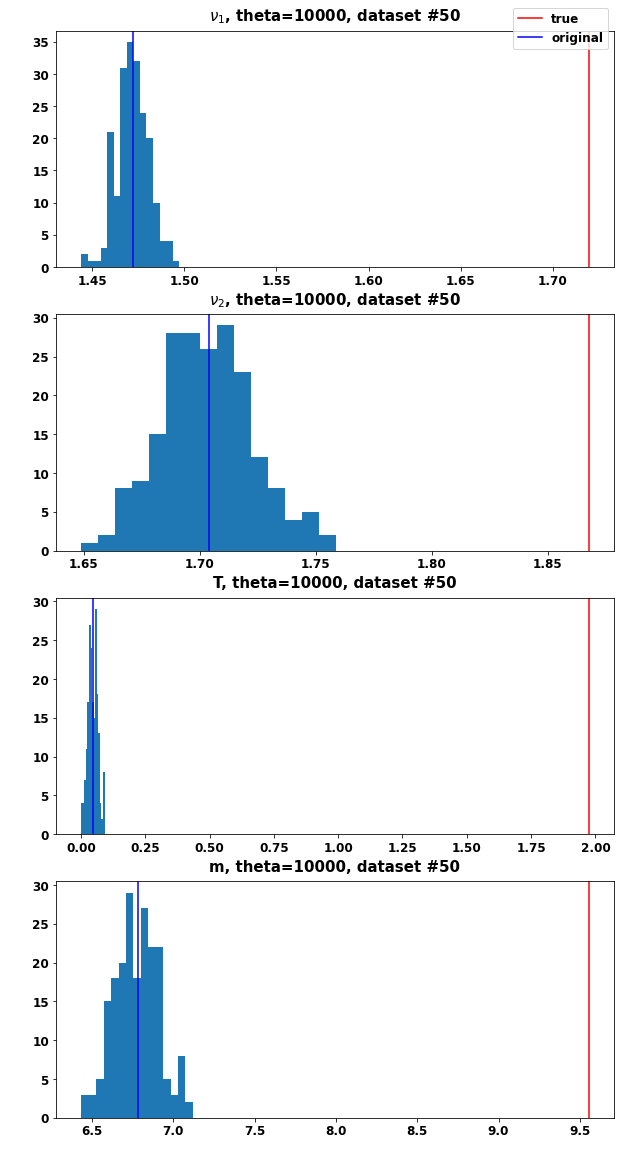

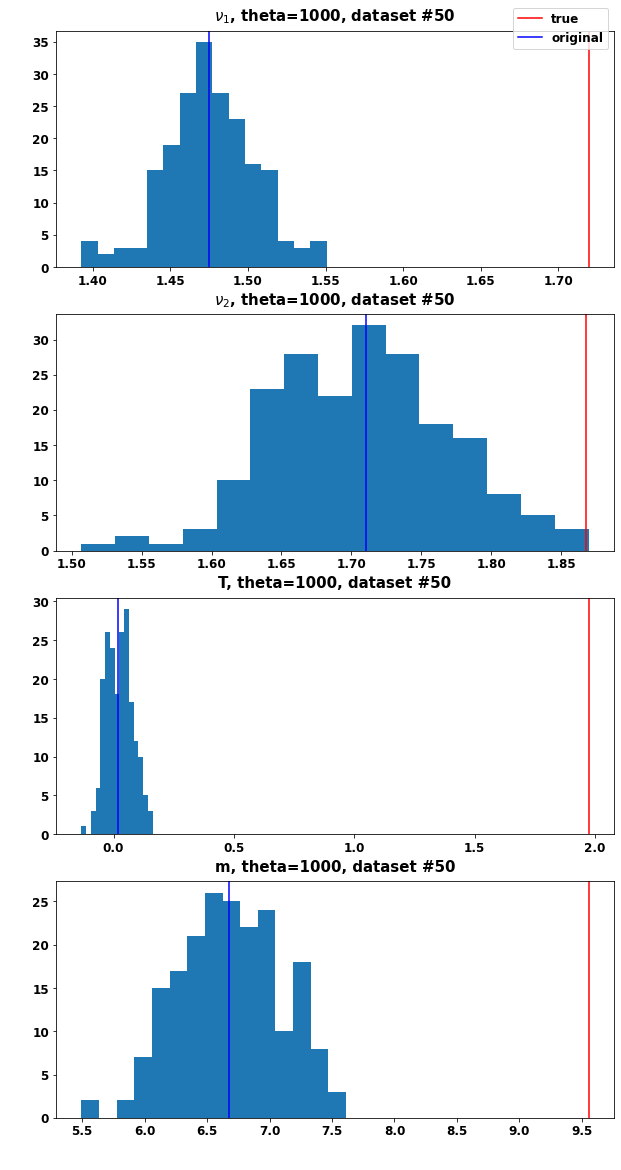

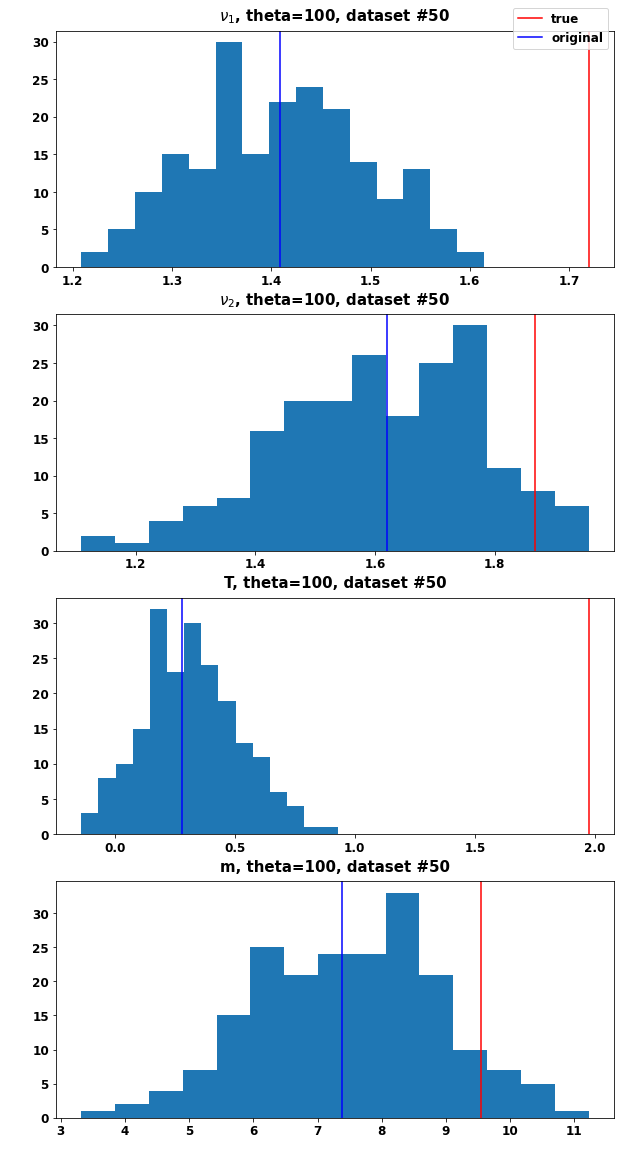

In [36]:
# Plot bootstrap prediction results: distribution for one example data set
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plotting.plot_distribution(bootstrap_pred,theta,params,50,figsize=(10,20))